In [1]:
import pandas as pd
import torch
import PIL.Image
from torchvision import transforms
import  numpy as np
import  torch
import torchvision
import torch.nn.functional as F
from torch import  nn
from torch import optim
import math

# 数据集预处理

In [2]:
data_file = "data/lungdatasets.csv"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)

## 处理数值类型

In [3]:
# csv使用分号分割，seq指定分隔符为；
data = pd.read_csv(data_file,sep=';')

# 住院时长周数为值
outputs = data.iloc[:, 25]
class_num_list = [0,0,0]
# double_list = outputs
for id,value in enumerate(outputs):
    if value <= 3:
        value = 0
        class_num_list[0] = class_num_list[0] + 1
    elif value<= 6:
        value = 1
        class_num_list[1] = class_num_list[1] + 1
    else:
        value = 2
        class_num_list[2] = class_num_list[2] + 1
    outputs[id] = value
# outputs = double_list


# 定义特征
all_features = data.iloc[:, 1:25]
strlist = ['性别(1=男，2=女）','入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）','出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）','出院时临床转归（0=临床治愈，1=病毒转阴）','首诊时有无发热（0=否，1=是）','以前曾是否患过肺炎（0=否，1=是）','病灶位置是否右上（1=是，0=否）','病灶位置是否右中（1=是，0=否）','病灶位置是否右下（1=是，0=否）','病灶位置是否左上（1=是，0=否）','病灶位置是否左下（1=是，0=否）']
all_features[strlist] = all_features[strlist].astype(np.str)
print(all_features.dtypes)


年龄(岁)                                      float64
性别(1=男，2=女）                                 object
入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）     object
出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）     object
出院时临床转归（0=临床治愈，1=病毒转阴）                      object
首次查体体温（℃）                                  float64
首诊时有无发热（0=否，1=是）                            object
身高（cm）                                     float64
体重(kg)                                     float64
既往史评分                                        int64
以前曾是否患过肺炎（0=否，1=是）                          object
ICU时长（天）                                     int64
呼吸机时长（小时）                                  float64
病灶位置是否右上（1=是，0=否）                           object
病灶位置是否右中（1=是，0=否）                           object
病灶位置是否右下（1=是，0=否）                           object
病灶位置是否左上（1=是，0=否）                           object
病灶位置是否左下（1=是，0=否）                           object
首次检查病灶体积总和（cm?）                            float64
首次检查全部病灶占全肺体积占比(%)             

c:\Users\lzwDT\anaconda3\envs\bilitorch\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 处理空值

In [4]:

zero_2_nan_Str = ['身高（cm）','体重(kg)','首次检查病灶体积总和（cm?）','首次检查全部病灶占全肺体积占比(%)','首次检查全部病灶的平均密度（HU）','末次检查病灶体积总和（cm?）','末次检查全部病灶占全肺体积占比(%)','末次检查全部病灶的平均密度（HU）']
all_features[zero_2_nan_Str] = all_features[zero_2_nan_Str].replace(0,np.nan)
all_features

,年龄(岁),性别(1=男，2=女）,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床转归（0=临床治愈，1=病毒转阴）,首次查体体温（℃）,首诊时有无发热（0=否，1=是）,身高（cm）,体重(kg),既往史评分,以前曾是否患过肺炎（0=否，1=是）,ICU时长（天）,呼吸机时长（小时）,病灶位置是否右上（1=是，0=否）,病灶位置是否右中（1=是，0=否）,病灶位置是否右下（1=是，0=否）,病灶位置是否左上（1=是，0=否）,病灶位置是否左下（1=是，0=否）,首次检查病灶体积总和（cm?）,首次检查全部病灶占全肺体积占比(%),首次检查全部病灶的平均密度（HU）,末次检查病灶体积总和（cm?）,末次检查全部病灶占全肺体积占比(%),末次检查全部病灶的平均密度（HU）
0,25.0,1,1.0,2.0,1.0,38.2,1.0,176.0,72.0,2,0.0,0,0.00,0,0,1,1,1.0,172.04,3.68,-335.00,NaN,NaN,NaN
1,29.0,1,2.0,2.0,1.0,36.5,0.0,165.0,70.0,0,0.0,0,0.00,0,0,1,0,0.0,26.49,0.53,-621.00,NaN,NaN,NaN
2,30.0,1,2.0,2.0,1.0,36.0,0.0,175.0,67.5,0,0.0,0,0.00,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41.0,2,0.0,0.0,1.0,36.5,1.0,156.0,72.5,0,0.0,0,0.00,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,29.0,2,1.0,2.0,1.0,39.0,1.0,160.0,70.0,0,0.0,0,0.00,0,0,1,1,1.0,44.36,1.20,-557.00,NaN,NaN,NaN
5,22.0,1,1.0,1.0,1.0,36.0,1.0,162.0,47.0,1,0.0,0,0.00,0,0,0,0,0.0,NaN,NaN,NaN,4.82,0.09,-590.00
6,61.0,2,3.0,3.0,1.0,37.8,1.0,165.0,66.5,1,0.0,9,201.38,1,1,1,1,1.0,479.46,25.19,-346.00,NaN,NaN,NaN
7,62.0,1,2.0,2.0,1.0,37.6,1.0,176.0,62.0,1,0.0,11,519.74,1,1,1,1,1.0,808.39,22.30,-458.00,2.60,0.07,-700.00
8,62.0,2,2.0,2.0,1.0,37.8,1.0,160.0,73.0,1,0.0,0,0.00,1,1,1,1,1.0,244.55,5.61,-656.00,6.97,0.16,-766.00
9,48.0,2,1.0,1.0,1.0,37.5,1.0,NaN,NaN,0,0.0,0,0.00,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## 删除无效列

In [5]:
del_list = ['出院时临床转归（0=临床治愈，1=病毒转阴）','出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）','末次检查病灶体积总和（cm?）','末次检查全部病灶占全肺体积占比(%)','末次检查全部病灶的平均密度（HU）','首次查体体温（℃）','ICU时长（天）','呼吸机时长（小时）']

# del_list = ['首次查体体温（℃）','ICU时长（天）','呼吸机时长（小时）']

all_features = all_features.drop(columns=del_list)
# all_features = all_features.drop(axis=0,)
# data.dropna(axis=0,how='any')
all_features

,年龄(岁),性别(1=男，2=女）,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,首诊时有无发热（0=否，1=是）,身高（cm）,体重(kg),既往史评分,以前曾是否患过肺炎（0=否，1=是）,病灶位置是否右上（1=是，0=否）,病灶位置是否右中（1=是，0=否）,病灶位置是否右下（1=是，0=否）,病灶位置是否左上（1=是，0=否）,病灶位置是否左下（1=是，0=否）,首次检查病灶体积总和（cm?）,首次检查全部病灶占全肺体积占比(%),首次检查全部病灶的平均密度（HU）
0,25.0,1,1.0,1.0,176.0,72.0,2,0.0,0,0,1,1,1.0,172.04,3.68,-335.00
1,29.0,1,2.0,0.0,165.0,70.0,0,0.0,0,0,1,0,0.0,26.49,0.53,-621.00
2,30.0,1,2.0,0.0,175.0,67.5,0,0.0,0,0,0,0,0.0,NaN,NaN,NaN
3,41.0,2,0.0,1.0,156.0,72.5,0,0.0,0,0,0,0,0.0,NaN,NaN,NaN
4,29.0,2,1.0,1.0,160.0,70.0,0,0.0,0,0,1,1,1.0,44.36,1.20,-557.00
5,22.0,1,1.0,1.0,162.0,47.0,1,0.0,0,0,0,0,0.0,NaN,NaN,NaN
6,61.0,2,3.0,1.0,165.0,66.5,1,0.0,1,1,1,1,1.0,479.46,25.19,-346.00
7,62.0,1,2.0,1.0,176.0,62.0,1,0.0,1,1,1,1,1.0,808.39,22.30,-458.00
8,62.0,2,2.0,1.0,160.0,73.0,1,0.0,1,1,1,1,1.0,244.55,5.61,-656.00
9,48.0,2,1.0,1.0,NaN,NaN,0,0.0,0,0,0,0,0.0,NaN,NaN,NaN


In [6]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index

# print(numeric_features[1])
# print(all_features[numeric_features])

all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=False)
all_features
data = pd.concat([all_features,outputs],axis=1)
data


,年龄(岁),身高（cm）,体重(kg),既往史评分,首次检查病灶体积总和（cm?）,首次检查全部病灶占全肺体积占比(%),首次检查全部病灶的平均密度（HU）,性别(1=男，2=女）_1,性别(1=男，2=女）_2,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_0.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_1.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_2.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_3.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_4.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_nan,首诊时有无发热（0=否，1=是）_0.0,首诊时有无发热（0=否，1=是）_1.0,首诊时有无发热（0=否，1=是）_nan,以前曾是否患过肺炎（0=否，1=是）_0.0,以前曾是否患过肺炎（0=否，1=是）_1.0,以前曾是否患过肺炎（0=否，1=是）_nan,病灶位置是否右上（1=是，0=否）_0,病灶位置是否右上（1=是，0=否）_1,病灶位置是否右中（1=是，0=否）_0,病灶位置是否右中（1=是，0=否）_1,病灶位置是否右下（1=是，0=否）_0,病灶位置是否右下（1=是，0=否）_1,病灶位置是否左上（1=是，0=否）_0,病灶位置是否左上（1=是，0=否）_1,病灶位置是否左下（1=是，0=否）_0.0,病灶位置是否左下（1=是，0=否）_1.0,病灶位置是否左下（1=是，0=否）_nan,住院时长(天)
0,-0.942885,0.805554,0.234401,2.316212,-0.093414,-0.023783,1.443427,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1
1,-0.690293,-0.066029,0.110304,-0.423394,-0.528198,-0.110194,-0.801605,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0
2,-0.627145,0.726319,-0.044819,-0.423394,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0
3,0.067482,-0.779142,0.265426,-0.423394,0.000000,0.000000,0.000000,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
4,-0.690293,-0.462203,0.110304,-0.423394,-0.474817,-0.091815,-0.299220,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1
5,-1.132328,-0.303733,-1.316822,0.946409,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
6,1.330441,-0.066029,-0.106868,0.946409,0.824906,0.566283,1.357079,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,2
7,1.393589,0.805554,-0.386088,0.946409,1.807480,0.487004,0.477906,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,2
8,1.393589,-0.462203,0.296450,0.946409,0.123187,0.029161,-1.076347,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1
9,0.509518,0.000000,0.000000,-0.423394,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1


    ## 数据集输入为inputs 输出为outpus 此时均为Dataframe类型

In [7]:
import  openpyxl
# xlsx_outputpath='data/after_lungdataset.xlsx'
# csv_outputpath='data/after_lungdataset.csv'
# all_features.to_excel(xlsx_outputpath,index=True,header=True)
# all_features.to_csv(csv_outputpath,sep=',',index=False,header=False)
# inputs = all_features
# outputs = outputs
# data = pd.concat([inputs, outputs], sort=False, axis=1)
#
# data = pd.read_csv('data/Data.csv',sep=';')
#
# # 住院时长周数为值
# y = data.iloc[:, 48]
#
# # 定义特征
# x = data.iloc[:, 1:48]


# 划分数据集

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    all_features,outputs, test_size=0.2, random_state=None)
X_train = x_train
X_test = x_test
x_train

,年龄(岁),身高（cm）,体重(kg),既往史评分,首次检查病灶体积总和（cm?）,首次检查全部病灶占全肺体积占比(%),首次检查全部病灶的平均密度（HU）,性别(1=男，2=女）_1,性别(1=男，2=女）_2,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_0.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_1.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_2.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_3.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_4.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_nan,首诊时有无发热（0=否，1=是）_0.0,首诊时有无发热（0=否，1=是）_1.0,首诊时有无发热（0=否，1=是）_nan,以前曾是否患过肺炎（0=否，1=是）_0.0,以前曾是否患过肺炎（0=否，1=是）_1.0,以前曾是否患过肺炎（0=否，1=是）_nan,病灶位置是否右上（1=是，0=否）_0,病灶位置是否右上（1=是，0=否）_1,病灶位置是否右中（1=是，0=否）_0,病灶位置是否右中（1=是，0=否）_1,病灶位置是否右下（1=是，0=否）_0,病灶位置是否右下（1=是，0=否）_1,病灶位置是否左上（1=是，0=否）_0,病灶位置是否左上（1=是，0=否）_1,病灶位置是否左下（1=是，0=否）_0.0,病灶位置是否左下（1=是，0=否）_1.0,病灶位置是否左下（1=是，0=否）_nan
85,1.077849,-0.620673,-0.572235,-0.423394,-0.488289,-0.075904,0.352310,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0
116,-0.185110,0.330145,1.041037,6.425621,-0.591108,-0.121990,-1.790675,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0
306,0.446370,0.000000,0.668744,-0.423394,-0.580952,-0.120070,-1.445285,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0
16,0.383222,-0.066029,-0.355063,0.946409,0.021444,0.012702,-0.110826,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
132,-0.121962,-0.462203,-1.130675,-0.423394,0.000000,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0
31,-0.374553,0.000000,0.000000,-0.423394,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0
100,0.446370,-0.462203,-0.075843,-0.423394,-0.426843,-0.086328,-1.421736,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0
414,-0.690293,0.488615,-0.820430,-0.423394,-0.460927,-0.070418,0.156066,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0
137,0.635813,0.409380,0.358499,-0.423394,0.702641,0.152332,-0.495464,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
292,0.572666,-0.382968,-0.075843,-0.423394,-0.604132,-0.123362,-0.903652,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0


## 计算各类总数

In [9]:
# 训练集各类总数
train_class_num_list = [0,0,0]
# double_list = outputs
for id,value in enumerate(y_train):
    if value == 0:
        train_class_num_list[0] = train_class_num_list[0] + 1
    elif value == 1:
        train_class_num_list[1] = train_class_num_list[1] + 1
    else:
        train_class_num_list[2] = train_class_num_list[2] + 1

# train_np_class_num_list = np.array([train_class_num_list[0],train_class_num_list[1],train_class_num_list[2]])
train_tensor_class_num_list = torch.tensor([train_class_num_list[0],train_class_num_list[1],train_class_num_list[2]])


# 测试集各类总数
test_class_num_list = [0,0,0]
# double_list = outputs
for id,value in enumerate(y_test):
    if value == 0:
        test_class_num_list[0] = test_class_num_list[0] + 1
    elif value == 1:
        test_class_num_list[1] = test_class_num_list[1] + 1
    else:
        test_class_num_list[2] = test_class_num_list[2] + 1


# train_np_class_num_list = np.array([test_class_num_list[0],test_class_num_list[1],test_class_num_list[2]])
test_tensor_class_num_list = torch.tensor([test_class_num_list[0],test_class_num_list[1],test_class_num_list[2]])

train_tensor_class_num_list,test_tensor_class_num_list

(tensor([ 56, 234,  62]), tensor([15, 62, 11]))

In [10]:
#输入
x_train = torch.tensor(x_train.values)
x_test = torch.tensor(x_test.values)
#输出
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

data_dim = x_train.shape[1]
# target_dim = target.shape[1]
# print(data)
print(data.shape)
print(data_dim,x_train.shape)
x_train.unique()

(440, 33)
32 torch.Size([352, 32])


tensor([-1.5953e+01, -6.6425e+00, -5.8502e+00, -3.6623e+00, -3.4575e+00,
        -2.9921e+00, -2.8680e+00, -2.5578e+00, -2.4584e+00, -2.4142e+00,
        -2.3953e+00, -2.3321e+00, -2.2690e+00, -2.1427e+00, -2.0795e+00,
        -2.0469e+00, -2.0164e+00, -1.9869e+00, -1.9320e+00, -1.9084e+00,
        -1.8901e+00, -1.8535e+00, -1.8456e+00, -1.8299e+00, -1.8142e+00,
        -1.7907e+00, -1.7122e+00, -1.7007e+00, -1.6886e+00, -1.6415e+00,
        -1.6271e+00, -1.5316e+00, -1.5159e+00, -1.5112e+00, -1.5030e+00,
        -1.4924e+00, -1.4845e+00, -1.4481e+00, -1.4453e+00, -1.4409e+00,
        -1.4374e+00, -1.4217e+00, -1.4130e+00, -1.3849e+00, -1.3825e+00,
        -1.3668e+00, -1.3511e+00, -1.3218e+00, -1.3197e+00, -1.3168e+00,
        -1.3040e+00, -1.2647e+00, -1.2586e+00, -1.2548e+00, -1.2546e+00,
        -1.2019e+00, -1.1955e+00, -1.1927e+00, -1.1784e+00, -1.1705e+00,
        -1.1548e+00, -1.1391e+00, -1.1323e+00, -1.1307e+00, -1.1156e+00,
        -1.0961e+00, -1.0763e+00, -1.0692e+00, -1.0

## 定义Dataset

In [11]:
from torch.utils.data import Dataset


class LungDataset(Dataset):

    def __init__(self,inputs,outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __getitem__(self, idx):
        vector = self.inputs[idx]
        label = self.outputs[idx]
        return vector,label

    def __len__(self):
        return len(self.outputs)

trainDataset = LungDataset(x_train,y_train)
testDataset = LungDataset(x_test,y_test)
x,y = trainDataset[0]
x.shape



torch.Size([32])

## 随机种子


In [12]:
# from torch.backends import cudnn
# import random
# cudnn.benchmark = False            # if benchmark=True, deterministic will be False
# cudnn.deterministic = True
#
# GLOBAL_SEED = 1
#
# def set_seed(seed):
#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)
#
# set_seed(1)
#
# GLOBAL_WORKER_ID = None
# def worker_init_fn(worker_id):
#     global GLOBAL_WORKER_ID
#     GLOBAL_WORKER_ID = worker_id
#     set_seed(GLOBAL_SEED + worker_id)
# # dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2, worker_init_fn=worker_init_fn)

# 搭建网络

In [13]:
class MnistNet(nn.Module):
    def __init__(self):
        super(MnistNet,self).__init__()
        self.fc1 = nn.Linear(32*1,17)  #定义Linear的输入和输出的形状
        self.fc2 = nn.Linear(17,3)  #定义Linear的输入和输出的形状

    def forward(self,x):
        x = x.view(-1,32*1)  #对数据形状变形，-1表示该位置根据后面的形状自动调整
        x = self.fc1(x) #[batch_size,28]

        # x = F.relu(x)  #[batch_size,28]
        # x = self.fc1_1(x) #[batch_size,10]

        x = F.relu(x)  #[batch_size,28]
        x = self.fc2(x) #[batch_size,10]
        return F.log_softmax(x, dim=-1)

In [14]:

# train_dataloader = torch.utils.data.DataLoader(data,batch_size=64,shuffle=True)

### 损失函数

In [15]:
import torch
from torch.nn.modules.loss import _Loss
import torch.nn.functional as F
import json


class BalancedSoftmax(_Loss):
    """
    Balanced Softmax Loss
    """
    def __init__(self, freq_path):
        super(BalancedSoftmax, self).__init__()
        with open(freq_path, 'r') as fd:
            freq = json.load(fd)
        freq = torch.tensor(freq)
        self.sample_per_class = freq

    def forward(self, input, label, reduction='mean'):
        return balanced_softmax_loss(label, input, self.sample_per_class, reduction)


def balanced_softmax_loss(labels, logits, sample_per_class, reduction):
    """Compute the Balanced Softmax Loss between `logits` and the ground truth `labels`.
    Args:
      labels: A int tensor of size [batch].
      logits: A float tensor of size [batch, no_of_classes].
      sample_per_class: A int tensor of size [no of classes].
      reduction: string. One of "none", "mean", "sum"
    Returns:
      loss: A float tensor. Balanced Softmax Loss.
    """
    spc = sample_per_class.type_as(logits)

    spc = spc.unsqueeze(0).expand(logits.shape[0], -1)

    logits = logits + spc.log()

    loss = F.cross_entropy(input=logits, target=labels, reduction=reduction)
    return loss


def create_loss(freq_path):
    print('Loading Balanced Softmax Loss.')
    return BalancedSoftmax(freq_path)

# 准备迭代器

In [16]:
train_batch_size = 64
test_batch_size = 128
img_size = data_dim

def get_dataloader(train=True):

    #准备数据集，其中0.1307，0.3081为MNIST数据的均值和标准差，这样操作能够对其进行标准化
    #因为MNIST只有一个通道（黑白图片）,所以元组中只有一个值
    dataset = trainDataset if train else testDataset
    #准备数据迭代器
    batch_size = train_batch_size if train else test_batch_size
    dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=True)
    return dataloader

# 训练

In [17]:
mnist_net = MnistNet().double()
optimizer = optim.Adam(mnist_net.parameters(),lr= 0.001)
train_loss_list = []
train_count_list = []
def train(epoch):
    mnist_net.train(True)
    train_dataloader = get_dataloader(True)
    optimizer.zero_grad()
    print("开始训练：")
    for idx,(data,target) in enumerate(train_dataloader):
        output = mnist_net(data)
        # loss = F.cross_entropy(output,target) #对数似然损失
        loss = F.nll_loss(output,target) #对数似然损失
        # loss = balanced_softmax_loss(labels = target, logits=output, reduction='mean', sample_per_class=train_tensor_class_num_list)
        loss.backward()
        optimizer.step()
        if idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,  idx * len(data), len(train_dataloader.dataset),100. * idx / len(train_dataloader), loss.item()))
            train_loss_list.append(loss.item())
            train_count_list.append(idx*train_batch_size+(epoch-1)*len(train_dataloader))
    print("结束训练。")



In [18]:
def acc_train():
    test_loss = 0
    correct = 0
    mnist_net.eval()
    test_dataloader = get_dataloader(train=True)
    with torch.no_grad():
        for data, target in test_dataloader:
            output = mnist_net(data)
            test_loss += F.nll_loss(output, target, reduction='mean').item()
            pred = output.data.max(1, keepdim=True)[1] #获取最大值的位置,[batch_size,1]

            # test_loss += balanced_softmax_loss(labels = target,
            #                                    logits=(output), reduction='mean',
            #                                    sample_per_class=train_tensor_class_num_list).item()
            # #output-math.log（）
            # spc = test_tensor_class_num_list.type_as(output)
            # spc = spc.unsqueeze(0).expand(output.shape[0], -1)
            # output = output - spc.log()
            # pred = output.data.max(1, keepdim=True)[1] #获取最大值的位置,[batch_size,1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_dataloader.dataset)

    print('\nTrain set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_dataloader.dataset),
        100. * correct / len(test_dataloader.dataset)))
    correct_rate = 100. * correct / len(test_dataloader.dataset)
    return correct_rate

# 测试

In [19]:
def test():
    test_loss = 0
    correct = 0
    mnist_net.eval()
    test_dataloader = get_dataloader(train=False)
    with torch.no_grad():
        for data, target in test_dataloader:
            output = mnist_net(data)
            test_loss += F.nll_loss(output, target, reduction='mean').item()

            # test_loss += balanced_softmax_loss(labels = target,
            #                                    logits=(output), reduction='mean',
            #                                    sample_per_class=test_tensor_class_num_list).item()
            #output-math.log（）
            # spc = test_tensor_class_num_list.type_as(output)
            # spc = spc.unsqueeze(0).expand(output.shape[0], -1)
            # output = output - spc.log()

            pred = output.data.max(1, keepdim=True)[1] #获取最大值的位置,[batch_size,1]
            correct += pred.eq(target.data.view_as(pred)).sum()


    test_loss /= len(test_dataloader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_dataloader.dataset),
        100. * correct / len(test_dataloader.dataset)))
    test_correct = 100. * correct / len(test_dataloader.dataset)
    return test_correct,test_loss

开始训练：
Train Epoch: 0 [0/352 (0%)]	Loss: 1.103828
结束训练。

Train set: Avg. loss: 0.0184, Accuracy: 112/352 (31.82%)


Test set: Avg. loss: 0.0122, Accuracy: 30/88 (34.09%)

开始训练：
Train Epoch: 1 [0/352 (0%)]	Loss: 1.070629
结束训练。

Train set: Avg. loss: 0.0179, Accuracy: 174/352 (49.43%)


Test set: Avg. loss: 0.0119, Accuracy: 43/88 (48.86%)

开始训练：
Train Epoch: 2 [0/352 (0%)]	Loss: 1.069632
结束训练。

Train set: Avg. loss: 0.0174, Accuracy: 217/352 (61.65%)


Test set: Avg. loss: 0.0115, Accuracy: 59/88 (67.05%)

开始训练：
Train Epoch: 3 [0/352 (0%)]	Loss: 1.045807
结束训练。

Train set: Avg. loss: 0.0169, Accuracy: 232/352 (65.91%)


Test set: Avg. loss: 0.0112, Accuracy: 62/88 (70.45%)

开始训练：
Train Epoch: 4 [0/352 (0%)]	Loss: 0.927973
结束训练。

Train set: Avg. loss: 0.0166, Accuracy: 234/352 (66.48%)


Test set: Avg. loss: 0.0108, Accuracy: 62/88 (70.45%)

开始训练：
Train Epoch: 5 [0/352 (0%)]	Loss: 0.966987
结束训练。

Train set: Avg. loss: 0.0160, Accuracy: 234/352 (66.48%)


Test set: Avg. loss: 0.0105, Accura

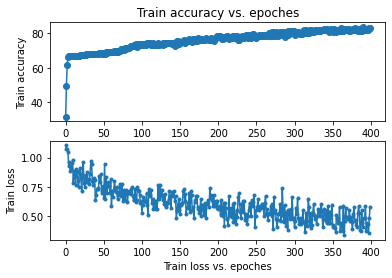

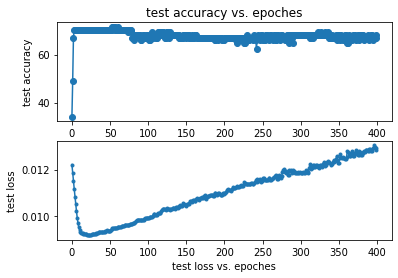

In [20]:
from matplotlib import pyplot as plt
import PIL
epoch = 400
#定义两个数组
Loss_list = []
Accuracy_list = []
test_Loss_list = []
test_Accuracy_list = []
# 训练
for i in range(epoch):
    train(i)
    correct_rate = acc_train()
    # Loss_list.append(c)
    Accuracy_list.append(correct_rate)

    test_correct,test_loss = test()
    test_Accuracy_list.append(test_correct)
    test_Loss_list.append(test_loss)





Loss_list = train_loss_list

#我这里迭代了200次，所以x的取值范围为(0，200)，然后再将每次相对应的准确率以及损失率附在x上
x1 = range(0, epoch)
x2 = range(0, epoch)
y1 = Accuracy_list
y2 = Loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Train accuracy vs. epoches')
plt.ylabel('Train accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('Train loss vs. epoches')
plt.ylabel('Train loss')
plt.savefig("accuracy_loss.jpg")
plt.show()

x1 = range(0, epoch)
x2 = range(0, epoch)
y1 = test_Accuracy_list
y2 = test_Loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('test accuracy vs. epoches')
plt.ylabel('test accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('test loss vs. epoches')
plt.ylabel('test loss')
plt.savefig("test_accuracy_loss.jpg")
plt.show()


In [21]:
test()


Test set: Avg. loss: 0.0129, Accuracy: 59/88 (67.05%)



(tensor(67.0455), 0.012934678143540575)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Glyph 30149 missing from current font.
Glyph 28790 missing from current font.
Glyph 20301 missing from current font.
Glyph 32622 missing from current font.
Glyph 26159 missing from current font.
Glyph 21542 missing from current font.
Glyph 21491 missing from current font.
Glyph 19979 missing from current font.
Glyph 65288 missing from current font.
Glyph 65292 missing from current font.
Glyph 65289 missing from current font.
Glyph 20197 missing from current font.
Glyph 21069 missing from current font.
Glyph 26366 missing from current font.
Glyph 24739 missing from current font.
Glyph 36807 missing from current font.
Glyph 32954 missing from current font.
Glyph 28814 missing from current font.
Glyph 24038 missing from current font.
Glyph 1997

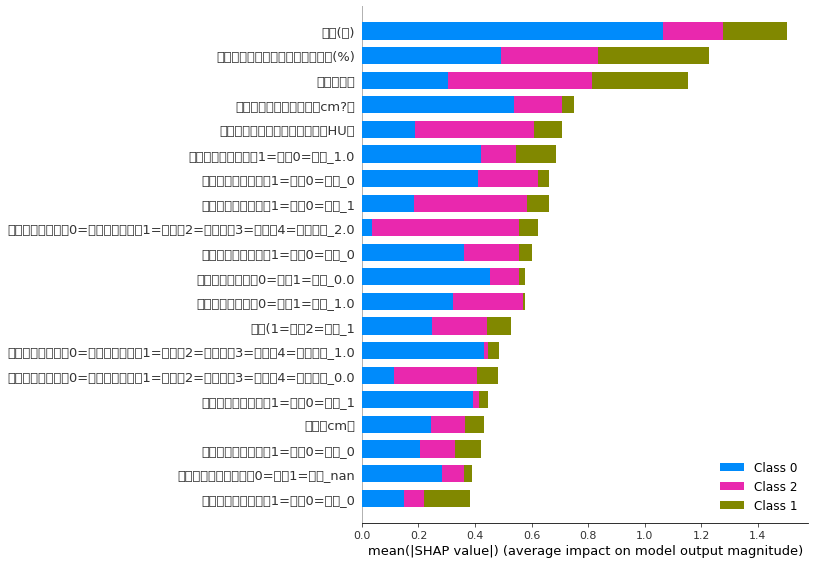

In [22]:
import shap

explainer = shap.DeepExplainer(mnist_net, torch.from_numpy(X_train.values).double())
shap_values = explainer.shap_values(torch.from_numpy(X_test.values).double())
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [23]:
torch.save(mnist_net.state_dict(),"../mnist_net.pt") #保存模型参数
torch.save(optimizer.state_dict(), '../mnist_optimizer.pt') #保存优化器参数

In [24]:
mnist_net.load_state_dict(torch.load("../mnist_net.pt"))
optimizer.load_state_dict(torch.load("../mnist_optimizer.pt"))

PermissionError: [Errno 13] Permission denied: '../mnist_net.pt'